<a href="https://colab.research.google.com/github/Diana9908/TP547/blob/main/Trabalho%20Final%20Filas/buffer_infinito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# M/M/1
# Exponencial
import numpy as np
np.random.seed(42)

t = 0                                               # tempo inicial
nq = 0                                              # numero de clientes na fila
ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
n = nq + ns                                         # numero de elementos no sistema
alpha = 8
lambda_i = alpha/(n+1)                              # taxa de chegada
mu = 12                                             # taxa de partida
k2 = 0                                              # variavel auxiliar
k = 0                                               # numero de partidas
ch = 0                                              # numero de chegadas

chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
partidas = np.random.exponential(1/mu, 1000000)     # vetor de partidas

tc = []  # tempo de chegada de cada cliente
tp = []  # tempo de partida de cada cliente
ts = []  # tempo no sistema de cada cliente

ta = t + chegada_i                                  # proxima chegada
td = np.inf                                         # proxima partida (inicializado como infinito porque não há nenhum cliente no sistema.)
t = np.minimum(ta, td)                              # proximo evento

tiempo_vacio = 0         # Tempo total em que o sistema ficou vazio

while(t < 50000):

  if ta < td:                                       # Chegada de un cliente
    ch = ch + 1                                     # Aumento o numero de chegadas

    # Servidor vazio
    if ns == 0:
      ns = 1                                        # Ocupe o servidor
      n = nq + ns                                   # Atualizo o numero de clientes no sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de chegada

      # Gero uma nova partida, pois o servidor está ocupado.
      td = t + partidas[k2]
      k2 = k2 + 1

      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tc = np.append(tc, t)

    # Servidor ocupado
    else:
      nq = nq + 1                                   # Aumento o numero de clientes na fila
      n = nq + ns                                   # Atualizo o numero de clientes en el sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de clegada
      # Gero uma nova clegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tc = np.append(tc, t)

  # Partida e chegada ao mesmo tempo
  elif ta == td:
    eventos = np.append(eventos, 2)                 # Evento partida e chegada ao mesmo tempo
    k = k + 1                                       # Aumentar o numero de partidas
    tp = np.append(tp, t)
    ts = np.append(ts,(tp[k-1] - tc[k-1]))          # Tempo no sistema do cliente
    # Gero uma nova partida
    td = t + partidas[k2]
    k2 = k2 + 1

    ch = ch + 1                                     # Aumentar o numero de partidas
    tc = np.append(tc, t)
    # Gero uma nova chegada
    chegada_i = np.random.exponential(1/lambda_i)
    ta = t + chegada_i

  # Partida do cliente
  else:
    k = k + 1

    # Fila vazia
    if nq == 0:
      ns = 0                                        # Servidor vazio
      n = 0                                         # Sistema vazio
      lambda_i = alpha/(n+1)                        # Atualizo a tasa de chegada

      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
      td = np.inf                                   # Tempo de partida infinito porque não tem clientes na fila

    # Fila ocupada
    else:
      nq = nq - 1                                   # Atualizo o numero de elementos na fila
      ns = 1                                        # Servidor ocupado
      n = nq + ns                                   # Atualizo o numero de clientes no sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de clegada

      # Gero uma nova clegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
      td = t + partidas[k2]                         # Proxima partida
      k2 = k2 + 1

  t_nuevo = np.minimum(ta, td)                      # Proximo evento
  dt = t_nuevo - t                                  # Calcula quanto tempo se passou desde o último evento (t) até o momento (t_new).
  if ns == 0 and nq == 0:
    tiempo_vacio = tiempo_vacio + dt                # Tempo em que o sistema ficou vazio
  t = t_nuevo

lambda_efectiva = ch / t
ts_average = np.mean(ts)
tq_average = ts_average - 1/mu
N = lambda_efectiva * ts_average
Nq = lambda_efectiva * tq_average
Po = tiempo_vacio / t
rho = 1 - Po

print('Fator de utilizacao rho:', rho)
print('Probabilidade de o servidor estar vazio:', Po)
print('Tempo no sistema:', ts_average)
print('Tempo na fila:', tq_average)
print('Numero medio de clientes no sistema:', N)
print('Numero medio de clientes na fila:', Nq)
print('Lambda efectiva:', lambda_efectiva)


Fator de utilizacao rho: 0.48719170076879337
Probabilidade de o servidor estar vazio: 0.5128082992312066
Tempo no sistema: 0.11435705921778586
Tempo na fila: 0.031023725884452527
Numero medio de clientes no sistema: 0.6675631164507904
Numero medio de clientes na fila: 0.18110202620634658
Lambda efectiva: 5.837533082933326


In [ ]:
# M/M/1 (variando taxa de chegada)
# Exponencial
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)

lambda_efectiva_i = np.zeros(len(alpha))
ts_average = np.zeros(len(alpha))                     # tempo medio no sistema
tq_average = np.zeros(len(alpha))                     # tempo medio na fila
N = np.zeros(len(alpha))                              # numero medio de clientes no sistema
Nq = np.zeros(len(alpha))                             # numero medio de clientes na fila
Po = np.zeros(len(alpha))                             # Probabilidade do o servidor estar vazio
rho = np.zeros(len(alpha))                            # Fator de utilizacao

for idx, a in enumerate(alpha):

  t = 0                                               # tempo inicial
  nq = 0                                              # numero de clientes na fila
  ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
  n = nq + ns                                         # numero de elementos no sistema
  lambda_i = a/(n+1)                                  # taxa de chegada
  mu = 12                                             # taxa de partida
  k2 = 0                                              # variavel auxiliar
  k = 0                                               # numero de partidas
  ch = 0                                              # numero de chegadas

  chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
  partidas = np.random.exponential(1/mu, 1000000)     # vetor de partidas

  tc = []  # tempo de chegada de cada cliente
  tp = []  # tempo de partida de cada cliente
  ts = []  # tempo no sistema de cada cliente

  ta = t + chegada_i                                  # proxima chegada
  td = np.inf                                         # proxima partida (inicializado como infinito porque não há nenhum cliente no sistema.)
  t = np.minimum(ta, td)                              # proximo evento

  tiempo_vacio = 0         # Tempo total em que o sistema ficou vazio

  while(t < 30000):

    if ta < td:                                       # Clegada de un cliente

      ch = ch + 1                                     # Aumento o numero de chegadas

      # Servidor vazio
      if ns == 0:
        ns = 1                                        # Ocupe o servidor
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de chegada
        # Gero uma nova partida, pois o servidor está ocupado.
        td = t + partidas[k2]
        k2 = k2 + 1


        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

      # Servidor ocupado
      else:
        nq = nq + 1                                   # Aumento o numero de clientes na fila
        n = nq + ns                                   # Atualizo o numero de clientes en el sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada
        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

    # Partida e chegada ao mesmo tempo
    elif ta == td:
      k = k + 1                                       # Aumentar o numero de partidas
      tp = np.append(tp, t)
      ts = np.append(ts,(tp[k-1] - tc[k-1]))          # Tempo no sistema do cliente
      # Gero uma nova partida
      td = t + partidas[k2]
      k2 = k2 + 1

      ch = ch + 1                                     # Aumentar o numero de partidas
      tc = np.append(tc, t)
      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

    # Partida do cliente
    else:
      k = k + 1

      # Fila vazia
      if nq == 0:
        ns = 0                                        # Servidor vazio
        n = 0                                         # Sistema vazio
        lambda_i = a/(n+1)                        # Atualizo a tasa de chegada

        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i

        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = np.inf                                   # Tempo de partida infinito porque não tem clientes na fila

      # Fila ocupada
      else:
        nq = nq - 1                                   # Atualizo o numero de elementos na fila
        ns = 1                                        # Servidor ocupado
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada

        # Gero uma nova clegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = t + partidas[k2]                         # Proxima partida
        k2 = k2 + 1

    t_nuevo = np.minimum(ta, td)                      # Proximo evento
    dt = t_nuevo - t                                  # Calcula quanto tempo se passou desde o último evento (t) até o momento (t_new).
    if ns == 0 and nq == 0:
      tiempo_vacio = tiempo_vacio + dt                # Tempo em que o sistema ficou vazio
    t = t_nuevo

  lambda_efectiva_i[idx] = ch / t
  ts_average[idx] = np.mean(ts)
  tq_average[idx] = ts_average[idx] - 1/mu
  N[idx] = lambda_efectiva_i[idx] * ts_average[idx]
  Nq[idx] = lambda_efectiva_i[idx] * tq_average[idx]
  Po[idx] = tiempo_vacio / t
  rho[idx] = 1 - Po[idx]


In [ ]:
rho_teorico = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  rho_teorico[idx] = 1 - np.exp(-a/mu)

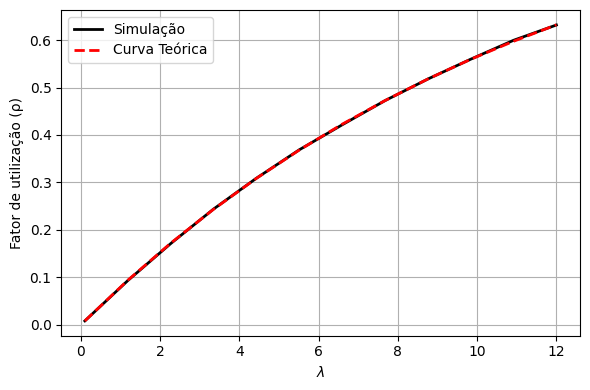

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(alpha, rho, color='black', linewidth=2)
plt.plot(alpha, rho_teorico, color='red', linewidth=2, linestyle='--')
plt.xlabel(r'$\lambda$')
plt.ylabel('Fator de utilização (ρ)')
plt.legend(['Simulação', 'Curva Teórica'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
N_teorico = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  N_teorico[idx] = a/mu

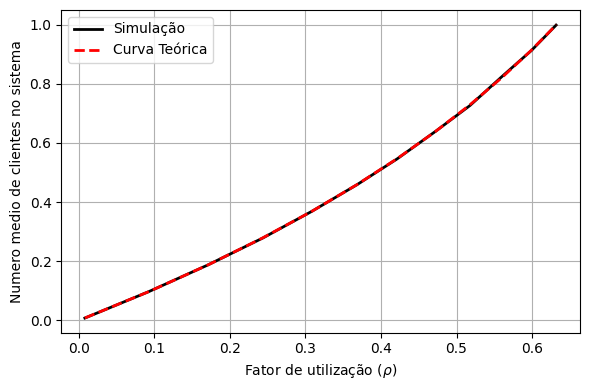

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(rho, N, color='black', linewidth=2)
plt.plot(rho_teorico, N_teorico, color='red', linewidth=2, linestyle='--')
plt.xlabel(r'Fator de utilização ($\rho$)')
plt.ylabel('Numero medio de clientes no sistema')
plt.legend(['Simulação', 'Curva Teórica'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ts_teorico = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  ts_teorico[idx] = a/((mu**2)*rho_teorico[idx])

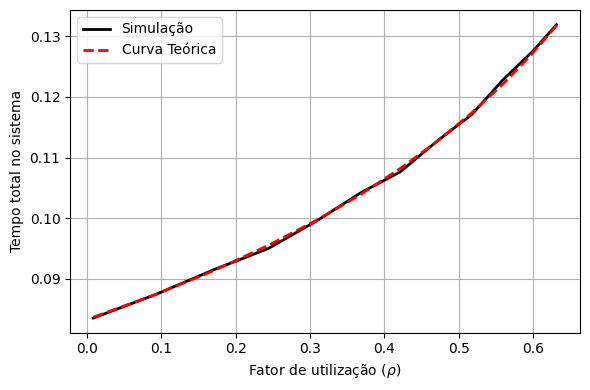

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(rho, ts_average, color='black', linewidth=2)
plt.plot(rho_teorico, ts_teorico, color='red', linewidth=2, linestyle='--')
plt.xlabel(r'Fator de utilização ($\rho$)')
plt.ylabel('Tempo total no sistema')
plt.legend(['Simulação', 'Curva Teórica'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# M/G/1
# Deterministica
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)

lambda_efectiva_i_det = np.zeros(len(alpha))
ts_average_det = np.zeros(len(alpha))                     # tempo medio no sistema
tq_average_det = np.zeros(len(alpha))                     # tempo medio na fila
N_det = np.zeros(len(alpha))                              # numero medio de clientes no sistema
Nq_det = np.zeros(len(alpha))                             # numero medio de clientes na fila
Po_det = np.zeros(len(alpha))                             # Probabilidade do o servidor estar vazio
rho_det = np.zeros(len(alpha))                            # Fator de utilizacao

for idx, a in enumerate(alpha):

  t = 0                                               # tempo inicial
  nq = 0                                              # numero de clientes na fila
  ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
  n = nq + ns                                         # numero de elementos no sistema
  lambda_i = a/(n+1)                                  # taxa de chegada
  mu = 12                                             # taxa de partida
  k2 = 0                                              # variavel auxiliar
  k = 0                                               # numero de partidas
  ch = 0                                              # numero de chegadas

  chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
  partidas = np.ones(1000000)*1/mu

  tc = []  # tempo de chegada de cada cliente
  tp = []  # tempo de partida de cada cliente
  ts = []  # tempo no sistema de cada cliente

  ta = t + chegada_i                                  # proxima chegada
  td = np.inf                                         # proxima partida (inicializado como infinito porque não há nenhum cliente no sistema.)
  t = np.minimum(ta, td)                              # proximo evento

  tiempo_vacio = 0         # Tempo total em que o sistema ficou vazio

  while(t < 30000):

    if ta < td:                                       # Clegada de un cliente

      ch = ch + 1                                     # Aumento o numero de chegadas

      # Servidor vazio
      if ns == 0:
        ns = 1                                        # Ocupe o servidor
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de chegada
        # Gero uma nova partida, pois o servidor está ocupado.
        td = t + partidas[k2]
        k2 = k2 + 1


        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

      # Servidor ocupado
      else:
        nq = nq + 1                                   # Aumento o numero de clientes na fila
        n = nq + ns                                   # Atualizo o numero de clientes en el sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada
        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

    # Partida e chegada ao mesmo tempo
    elif ta == td:
      k = k + 1                                       # Aumentar o numero de partidas
      tp = np.append(tp, t)
      ts = np.append(ts,(tp[k-1] - tc[k-1]))          # Tempo no sistema do cliente
      # Gero uma nova partida
      td = t + partidas[k2]
      k2 = k2 + 1

      ch = ch + 1                                     # Aumentar o numero de partidas
      tc = np.append(tc, t)
      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

    # Partida do cliente
    else:
      k = k + 1

      # Fila vazia
      if nq == 0:
        ns = 0                                        # Servidor vazio
        n = 0                                         # Sistema vazio
        lambda_i = a/(n+1)                        # Atualizo a tasa de chegada

        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i

        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = np.inf                                   # Tempo de partida infinito porque não tem clientes na fila

      # Fila ocupada
      else:
        nq = nq - 1                                   # Atualizo o numero de elementos na fila
        ns = 1                                        # Servidor ocupado
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada

        # Gero uma nova clegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = t + partidas[k2]                         # Proxima partida
        k2 = k2 + 1

    t_nuevo = np.minimum(ta, td)                      # Proximo evento
    dt = t_nuevo - t                                  # Calcula quanto tempo se passou desde o último evento (t) até o momento (t_new).
    if ns == 0 and nq == 0:
      tiempo_vacio = tiempo_vacio + dt                # Tempo em que o sistema ficou vazio
    t = t_nuevo

  lambda_efectiva_i_det[idx] = ch / t
  ts_average_det[idx] = np.mean(ts)
  tq_average_det[idx] = ts_average_det[idx] - 1/mu
  N_det[idx] = lambda_efectiva_i_det[idx] * ts_average_det[idx]
  Nq_det[idx] = lambda_efectiva_i_det[idx] * tq_average_det[idx]
  Po_det[idx] = tiempo_vacio / t
  rho_det[idx] = 1 - Po_det[idx]


In [ ]:
# M/G/1
# Uniforme
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)

lambda_efectiva_i_unif = np.zeros(len(alpha))
ts_average_unif = np.zeros(len(alpha))                     # tempo medio no sistema
tq_average_unif = np.zeros(len(alpha))                     # tempo medio na fila
N_unif = np.zeros(len(alpha))                              # numero medio de clientes no sistema
Nq_unif = np.zeros(len(alpha))                             # numero medio de clientes na fila
Po_unif = np.zeros(len(alpha))                             # Probabilidade do o servidor estar vazio
rho_unif = np.zeros(len(alpha))                            # Fator de utilizacao

for idx, a in enumerate(alpha):

  t = 0                                               # tempo inicial
  nq = 0                                              # numero de clientes na fila
  ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
  n = nq + ns                                         # numero de elementos no sistema
  lambda_i = a/(n+1)                                  # taxa de chegada
  mu = 12                                             # taxa de partida
  k2 = 0                                              # variavel auxiliar
  k = 0                                               # numero de partidas
  ch = 0                                              # numero de chegadas

  chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
  inf = 0.0112
  sup = 0.155
  partidas = np.random.uniform(inf, sup, 1000000)

  tc = []  # tempo de chegada de cada cliente
  tp = []  # tempo de partida de cada cliente
  ts = []  # tempo no sistema de cada cliente

  ta = t + chegada_i                                  # proxima chegada
  td = np.inf                                         # proxima partida (inicializado como infinito porque não há nenhum cliente no sistema.)
  t = np.minimum(ta, td)                              # proximo evento

  tiempo_vacio = 0         # Tempo total em que o sistema ficou vazio

  while(t < 30000):

    if ta < td:                                       # Clegada de un cliente

      ch = ch + 1                                     # Aumento o numero de chegadas

      # Servidor vazio
      if ns == 0:
        ns = 1                                        # Ocupe o servidor
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de chegada
        # Gero uma nova partida, pois o servidor está ocupado.
        td = t + partidas[k2]
        k2 = k2 + 1


        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

      # Servidor ocupado
      else:
        nq = nq + 1                                   # Aumento o numero de clientes na fila
        n = nq + ns                                   # Atualizo o numero de clientes en el sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada
        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

    # Partida e chegada ao mesmo tempo
    elif ta == td:
      k = k + 1                                       # Aumentar o numero de partidas
      tp = np.append(tp, t)
      ts = np.append(ts,(tp[k-1] - tc[k-1]))          # Tempo no sistema do cliente
      # Gero uma nova partida
      td = t + partidas[k2]
      k2 = k2 + 1

      ch = ch + 1                                     # Aumentar o numero de partidas
      tc = np.append(tc, t)
      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

    # Partida do cliente
    else:
      k = k + 1

      # Fila vazia
      if nq == 0:
        ns = 0                                        # Servidor vazio
        n = 0                                         # Sistema vazio
        lambda_i = a/(n+1)                        # Atualizo a tasa de chegada

        # Gero uma nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i

        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = np.inf                                   # Tempo de partida infinito porque não tem clientes na fila

      # Fila ocupada
      else:
        nq = nq - 1                                   # Atualizo o numero de elementos na fila
        ns = 1                                        # Servidor ocupado
        n = nq + ns                                   # Atualizo o numero de clientes no sistema

        lambda_i = a/(n+1)                        # Atualizo a taxa de clegada

        # Gero uma nova clegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tp = np.append(tp, t)
        ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
        td = t + partidas[k2]                         # Proxima partida
        k2 = k2 + 1

    t_nuevo = np.minimum(ta, td)                      # Proximo evento
    dt = t_nuevo - t                                  # Calcula quanto tempo se passou desde o último evento (t) até o momento (t_new).
    if ns == 0 and nq == 0:
      tiempo_vacio = tiempo_vacio + dt                # Tempo em que o sistema ficou vazio
    t = t_nuevo

  lambda_efectiva_i_unif[idx] = ch / t
  ts_average_unif[idx] = np.mean(ts)
  tq_average_unif[idx] = ts_average_unif[idx] - (inf + sup) / 2
  N_unif[idx] = lambda_efectiva_i_unif[idx] * ts_average_unif[idx]
  Nq_unif[idx] = lambda_efectiva_i_unif[idx] * tq_average_unif[idx]
  Po_unif[idx] = tiempo_vacio / t
  rho_unif[idx] = 1 - Po_unif[idx]


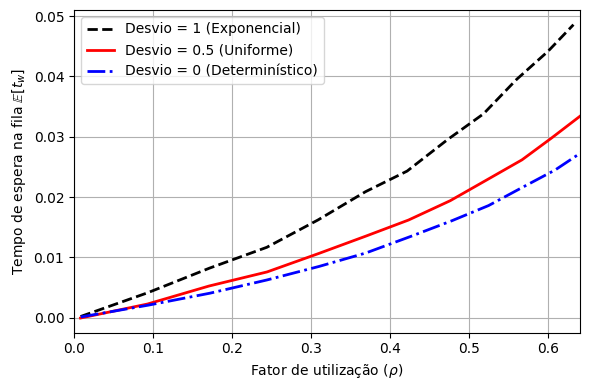

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(rho, tq_average, color='black', linewidth=2, linestyle = '--')
plt.plot(rho_unif, tq_average_unif, color='red', linewidth=2)
plt.plot(rho_det, tq_average_det, color='blue', linewidth=2, linestyle = '-.')
plt.xlim(0, 0.64)
#plt.ylim(0, 0.2)

plt.xlabel(r'Fator de utilização ($\rho$)')
plt.ylabel(r'Tempo de espera na fila $\mathbb{E}[t_w]$')
plt.legend(['Desvio = 1 (Exponencial)', 'Desvio = 0.5 (Uniforme)', 'Desvio = 0 (Determinístico)'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# M/M/1 Clásico
import numpy as np

alpha = np.linspace(0.1, 12, 12)

tw_c = np.zeros(len(alpha))
eq_c = np.zeros(len(alpha))
ew_c = np.zeros(len(alpha))
rho_c = np.zeros(len(alpha))

for idx, a in enumerate(alpha):
    t = 0  # tempo inicial
    lq = 0  # numero de elementos na fila
    ls = 1  # numero de elementos no servidor
    k1 = 0  # variavel auxiliar
    k2 = 0  # variavel auxiliar
    k = 0  # numero de partidas
    lambda1 = a  # taxa media de chegada
    mu1 = 12  # taxa media de partida
    chegadas = np.random.exponential(1 / lambda1, 1000000)  # vetor de chegadas

    partidas = np.random.exponential(1 / mu1, 1000000)  # vetor de partidas
    tc = [0]  # tempo de chegadas
    tp = []  # tempo de partidas
    ts = []  # tempo no sistema

    ta = t + chegadas[k1]  # proxima chegada
    td = t + partidas[k2]  # proxima partida
    t = np.minimum(ta, td)  # proximo tempo de execucao

    while (t < 10000):
        if ta < td:
            k1 = k1 + 1
            ta = []  # apaga o tempo de chegada atual
            if ls == 1:  # servidor ocupado
                lq = lq + 1  # aumenta a fila
                ta = t + chegadas[k1]  # gera nova chegada
                tc = np.append(tc, t)  # aramazena tempo atual de chegada
            else:  # servidor desocupado
                ls = 1  # ocupa o servidor
                k2 = k2 + 1
                td = t + partidas[k2]  # gera nova partida
                ta = t + chegadas[k1]  # gera nova chegada
                tc = np.append(tc, t)  # aramazena tempo atual de chegada

        elif ta == td:  # chegada e partida simultanea
            tc = np.append(tc, t)  # armazena o tempo atual de chegada
            tp = np.append(tp, t)  # armazena o tempo atual de partida

            k = k + 1  # incrementa a partida

            ts = np.append(ts, (tp[k - 1] - tc[k - 1]))  # calcula o tempo no sistema

            ta = []  # apaga os valores atuais de chegada e partida
            td = []
            k1 = k1 + 1
            k2 = k2 + 1
            td = t + partidas[k2]  # calcula a proxima partida
            ta = t + chegadas[k1]  # calcula a proxima chegada

        else:  # evento de partida
            td = []  # apaga o tempo de partida

            k = k + 1  # incrementa o numero de partidas

            if lq > 0:
                tp = np.append(tp, t)  # armazeno o tempo da partida
                ts = np.append(ts, (tp[k - 1] - tc[k - 1]))  # calculo o tempo no sistema
                lq = lq - 1  # diminuo a fila em 1
                k2 = k2 + 1
                td = t + partidas[k2]  # calculo a proxima partida
            else:  # nao ha pacotes na fila
                tp = np.append(tp, t)  # armazeno o tempo da partida
                ts = np.append(ts, (tp[k - 1] - tc[k - 1]))  # calculo o tempo no sistema

                td = np.inf  # coloco um valor muito grande para a proxima partida
                ls = 0  # esvazio o servidor

        t = np.minimum(ta, td)  # calculo o tempo minimo entre chegada e partida

    tw_c[idx] = np.mean(ts) - 1 / mu1
    eq_c[idx] = lambda1 * np.mean(ts)
    ew_c[idx] = lambda1 * tw_c[idx]
    rho_c[idx] = lambda1 / mu1


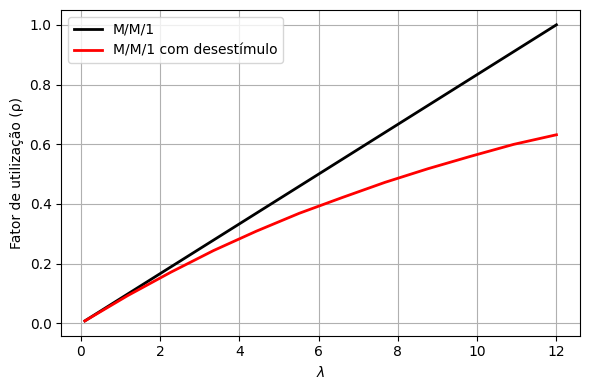

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(alpha, rho_c, color='black', linewidth=2, linestyle = '-')
plt.plot(alpha, rho, color = 'red', linewidth=2, linestyle = '-')

plt.xlabel(r'$\lambda$')
plt.ylabel('Fator de utilização (ρ)')

plt.legend(['M/M/1', 'M/M/1 com desestímulo'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# M/M/1
# Exponencial
import numpy as np
np.random.seed(42)

t = 0                                               # tempo inicial
nq = 0                                              # numero de clientes na fila
ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
n = nq + ns                                         # numero de elementos no sistema
alpha = 10
lambda_i = alpha/(n+1)                              # taxa de chegada
mu = 12                                             # taxa de partida
k2 = 0                                              # variavel auxiliar
k = 0                                               # numero de partidas
ch = 0                                              # numero de chegadas

chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
#partidas = np.random.exponential(1/mu, 1000000)     # vetor de partidas
#partidas = np.ones(1000000)*(1/mu)     # vetor de partidas
inf = 0.0112
sup = 0.155
partidas = np.random.uniform(inf, sup, 1000000)

tc = []  # tempo de chegada de cada cliente
tp = []  # tempo de partida de cada cliente
ts = []  # tempo no sistema de cada cliente

ta = t + chegada_i                                  # proxima chegada
td = np.inf                                         # proxima partida (inicializado como infinito porque não há nenhum cliente no sistema.)
t = np.minimum(ta, td)                              # proximo evento

tiempo_vacio = 0         # Tempo total em que o sistema ficou vazio

while(t < 50000):

  if ta < td:                                       # Chegada de un cliente
    ch = ch + 1                                     # Aumento o numero de chegadas

    # Servidor vazio
    if ns == 0:
      ns = 1                                        # Ocupe o servidor
      n = nq + ns                                   # Atualizo o numero de clientes no sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de chegada

      # Gero uma nova partida, pois o servidor está ocupado.
      td = t + partidas[k2]
      k2 = k2 + 1

      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tc = np.append(tc, t)

    # Servidor ocupado
    else:
      nq = nq + 1                                   # Aumento o numero de clientes na fila
      n = nq + ns                                   # Atualizo o numero de clientes en el sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de clegada
      # Gero uma nova clegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tc = np.append(tc, t)

  # Partida e chegada ao mesmo tempo
  elif ta == td:
    eventos = np.append(eventos, 2)                 # Evento partida e chegada ao mesmo tempo
    k = k + 1                                       # Aumentar o numero de partidas
    tp = np.append(tp, t)
    ts = np.append(ts,(tp[k-1] - tc[k-1]))          # Tempo no sistema do cliente
    # Gero uma nova partida
    td = t + partidas[k2]
    k2 = k2 + 1

    ch = ch + 1                                     # Aumentar o numero de partidas
    tc = np.append(tc, t)
    # Gero uma nova chegada
    chegada_i = np.random.exponential(1/lambda_i)
    ta = t + chegada_i

  # Partida do cliente
  else:
    k = k + 1

    # Fila vazia
    if nq == 0:
      ns = 0                                        # Servidor vazio
      n = 0                                         # Sistema vazio
      lambda_i = alpha/(n+1)                        # Atualizo a tasa de chegada

      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
      td = np.inf                                   # Tempo de partida infinito porque não tem clientes na fila

    # Fila ocupada
    else:
      nq = nq - 1                                   # Atualizo o numero de elementos na fila
      ns = 1                                        # Servidor ocupado
      n = nq + ns                                   # Atualizo o numero de clientes no sistema

      lambda_i = alpha/(n+1)                        # Atualizo a taxa de clegada

      # Gero uma nova clegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))   # Tempo no sistema do cliente
      td = t + partidas[k2]                         # Proxima partida
      k2 = k2 + 1

  t_nuevo = np.minimum(ta, td)                      # Proximo evento
  dt = t_nuevo - t                                  # Calcula quanto tempo se passou desde o último evento (t) até o momento (t_new).
  if ns == 0 and nq == 0:
    tiempo_vacio = tiempo_vacio + dt                # Tempo em que o sistema ficou vazio
  t = t_nuevo

lambda_efectiva = ch / t
ts_average = np.mean(ts)
tq_average = ts_average - 1/mu
N = lambda_efectiva * ts_average
Nq = lambda_efectiva * tq_average
Po = tiempo_vacio / t
rho = 1 - Po

print('Fator de utilizacao rho:', rho)
print('Probabilidade de o servidor estar vazio:', Po)
print('Tempo no sistema:', ts_average)
print('Tempo na fila:', tq_average)
print('Numero medio de clientes no sistema:', N)
print('Numero medio de clientes na fila:', Nq)
print('Lambda efectiva:', lambda_efectiva)


Fator de utilizacao rho: 0.5714831169541619
Probabilidade de o servidor estar vazio: 0.4285168830458382
Tempo no sistema: 0.10980681022107483
Tempo na fila: 0.0264734768877415
Numero medio de clientes no sistema: 0.7547746500814885
Numero medio de clientes na fila: 0.18196967213742526
Lambda efectiva: 6.873659735328759
